In [41]:
import numpy as np
import pandas as pd
from pyAudioAnalysis import audioTrainTest as aT
from pyAudioAnalysis import ShortTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO 
import plotly
import IPython
DATA_PATH = "MADReSS_Challenge_2022/data/train/"
SAMPLES = "MADReSS_Challenge_2022/data/sample/"

In [52]:
# read audio data from file 
# (returns sampling freq and signal as a numpy array)
fs, s = aIO.read_audio_file("MADReSS_Challenge_2022/data/sample/madrs-smpl1.mp3")
s = s.mean(axis=1)
# play the initial and the generated files in notebook:
IPython.display.display(IPython.display.Audio(s,rate=fs))


# feature extration for 1 file

In [132]:
def extract_feats(path,win,step, verbose = False):

    fs, s = aIO.read_audio_file(path)
    # print duration in seconds:
    duration = len(s) / float(fs)
    if verbose:
        print(path)
        print(f'duration = {duration} seconds')
    s = s.mean(axis=1) if len(s.shape)!=1 else s # if audio not mono, make it mono
    [f, fn] = aF.feature_extraction(s, fs, int(fs * win), 
                                int(fs * step))
    return f,fn

win, step = 0.050, 0.050
f, fn = extract_feats("MADReSS_Challenge_2022/data/sample/madrs-smpl1.mp3",win,step)
f.shape,fn

((68, 936),
 ['zcr',
  'energy',
  'energy_entropy',
  'spectral_centroid',
  'spectral_spread',
  'spectral_entropy',
  'spectral_flux',
  'spectral_rolloff',
  'mfcc_1',
  'mfcc_2',
  'mfcc_3',
  'mfcc_4',
  'mfcc_5',
  'mfcc_6',
  'mfcc_7',
  'mfcc_8',
  'mfcc_9',
  'mfcc_10',
  'mfcc_11',
  'mfcc_12',
  'mfcc_13',
  'chroma_1',
  'chroma_2',
  'chroma_3',
  'chroma_4',
  'chroma_5',
  'chroma_6',
  'chroma_7',
  'chroma_8',
  'chroma_9',
  'chroma_10',
  'chroma_11',
  'chroma_12',
  'chroma_std',
  'delta zcr',
  'delta energy',
  'delta energy_entropy',
  'delta spectral_centroid',
  'delta spectral_spread',
  'delta spectral_entropy',
  'delta spectral_flux',
  'delta spectral_rolloff',
  'delta mfcc_1',
  'delta mfcc_2',
  'delta mfcc_3',
  'delta mfcc_4',
  'delta mfcc_5',
  'delta mfcc_6',
  'delta mfcc_7',
  'delta mfcc_8',
  'delta mfcc_9',
  'delta mfcc_10',
  'delta mfcc_11',
  'delta mfcc_12',
  'delta mfcc_13',
  'delta chroma_1',
  'delta chroma_2',
  'delta chroma_3',

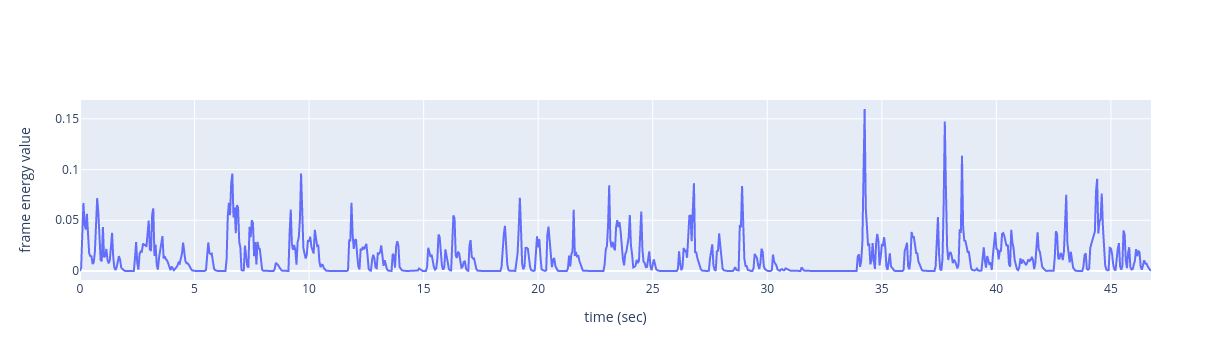

In [97]:
# plot short-term energy
# create time axis in seconds
time = np.arange(0, duration - step, win) 
# get the feature whose name is 'energy'
energy = f[fn.index('energy'), :]
mylayout = go.Layout(yaxis=dict(title="frame energy value"),
                     xaxis=dict(title="time (sec)"))
plotly.offline.iplot(go.Figure(data=[go.Scatter(x=time, 
                                                y=energy)], 
                               layout=mylayout))

# Feature Extraction for all files

In [138]:
from pathlib import Path
    
training_df = pd.read_csv("MADReSS_Challenge_2022/data/training-groundtruth.csv")
win, step = 0.5, 0.2
for fname in training_df["adressfname"]:
    csv_path = "pyAudioFeatures/%s.csv"%(fname)
    my_file = Path(csv_path)
    if not my_file.is_file():
        f, fn = extract_feats("MADReSS_Challenge_2022/data/train/%s.mp3"%fname,win,step,verbose=True)
        pd.DataFrame(f,fn).T.to_csv(csv_path,index=False)
